In [1]:
import sys
sys.path.append('../../')
from utils.google_trends import GoogleTrends
from utils import misc
import analytics.video_games.data_preprocessing as data_preprocess
import pandas as pd
import re
import string
from collections import defaultdict
import dateutil.relativedelta as timedelta
gt = GoogleTrends()

2019-12-06 08:15:45,120 | [google_trends.py __init__:35] | [INFO] - Successfully connected session to Google Trends


# 1 Analysis of Movies

## 1.1 Individual Movies vs Search Trends


In [2]:
box_office_df = pd.read_csv("../../../conf/movies/box_office.csv").set_index('Date')
box_office_df.set_index(pd.to_datetime(box_office_df.index), inplace=True)

2019-12-06 08:15:45,150 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Avengers Endgame'], start_date - 2019-04-26, end_date - 2019-05-26, category - None and geo - US
2019-12-06 08:15:46,055 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (31, 1)
2019-12-06 08:15:46,055 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Avengers Endgame
date                        
2019-04-26                94
2019-04-27               100
2019-04-28                92
2019-04-29                58
2019-04-30                35


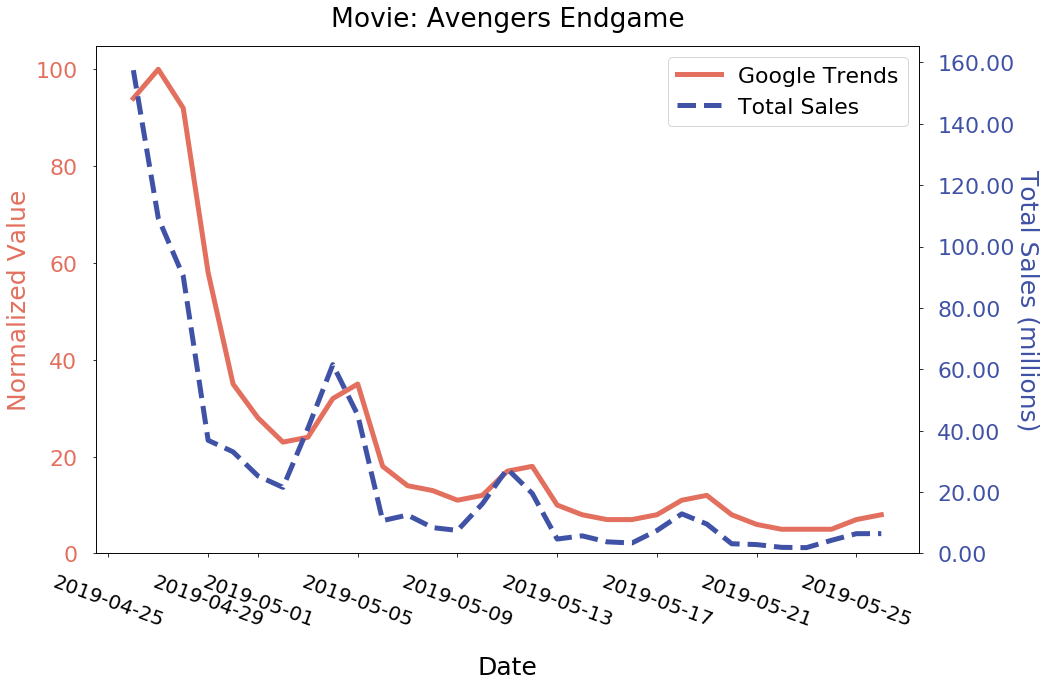

In [3]:
keywords = ['Avengers Endgame']
start_date = '2019-04-26'
end_date = '2019-05-26'
avengers_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
avengers_sales = box_office_df['avengers'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(df1=avengers_trends, df2=avengers_sales, save_fig=False)

2019-12-06 08:15:46,433 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Black Panther'], start_date - 2018-02-16, end_date - 2018-03-16, category - None and geo - US
2019-12-06 08:15:46,711 | [google_trends.py get_trends_data:77] | [ERROR] - Exception occurred in getting data from Google Trends
Traceback (most recent call last):
  File "../..\utils\google_trends.py", line 70, in get_trends_data
    self.trend_request.build_payload(kw_list=keywords, cat=category, timeframe=timeframe, geo=geo)
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 167, in build_payload
    self._tokens()
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 177, in _tokens
    trim_chars=4,
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 146, in _get_data
    response=response)
pytrends.exceptions.ResponseError: The request failed: Google returned a response with code 429.


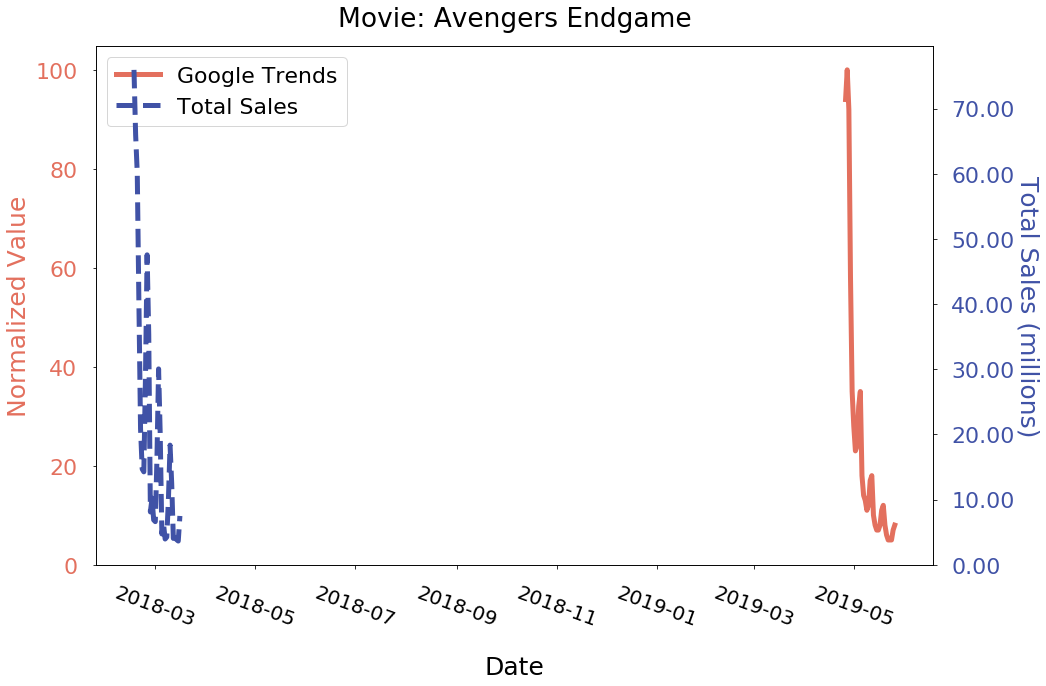

In [4]:
keywords = ['Black Panther']
start_date = '2018-02-16'
end_date = '2018-03-16'
blackpanther_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
blackpanther_sales = box_office_df['blackpanther'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(blackpanther_trends, blackpanther_sales, False, "Black Panther Time Series")

2019-12-06 08:15:47,062 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Star Wars'], start_date - 2017-12-15, end_date - 2018-01-15, category - None and geo - US
2019-12-06 08:15:47,369 | [google_trends.py get_trends_data:77] | [ERROR] - Exception occurred in getting data from Google Trends
Traceback (most recent call last):
  File "../..\utils\google_trends.py", line 70, in get_trends_data
    self.trend_request.build_payload(kw_list=keywords, cat=category, timeframe=timeframe, geo=geo)
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 167, in build_payload
    self._tokens()
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 177, in _tokens
    trim_chars=4,
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 146, in _get_data
    response=response)
pytrends.exceptions.ResponseError: The request failed: Google returned a response with code 429.


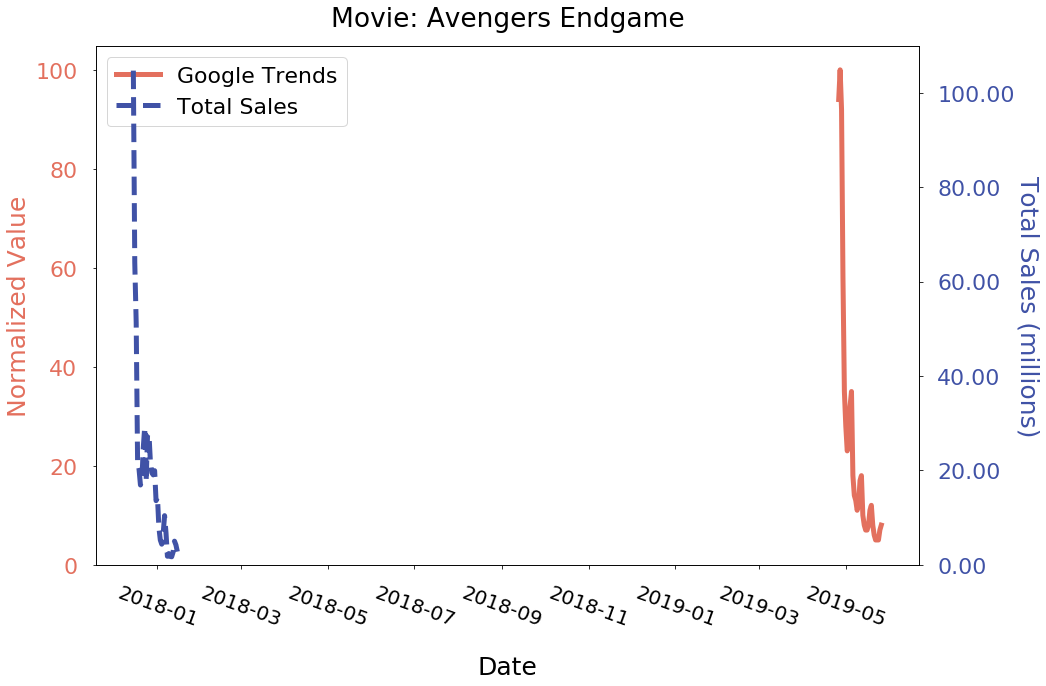

In [5]:
keywords = ['Star Wars']
start_date = '2017-12-15'
end_date = '2018-01-15'
starwars_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
starwars_sales = box_office_df['starwars'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(starwars_trends, starwars_sales, False, "Star Wars Time Series")

2019-12-06 08:15:47,662 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Jurassic World'], start_date - 2015-06-12, end_date - 2015-07-12, category - None and geo - US
2019-12-06 08:15:47,798 | [google_trends.py get_trends_data:77] | [ERROR] - Exception occurred in getting data from Google Trends
Traceback (most recent call last):
  File "../..\utils\google_trends.py", line 70, in get_trends_data
    self.trend_request.build_payload(kw_list=keywords, cat=category, timeframe=timeframe, geo=geo)
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 167, in build_payload
    self._tokens()
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 177, in _tokens
    trim_chars=4,
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 146, in _get_data
    response=response)
pytrends.exceptions.ResponseError: The request failed: Google returned a response with code 429.


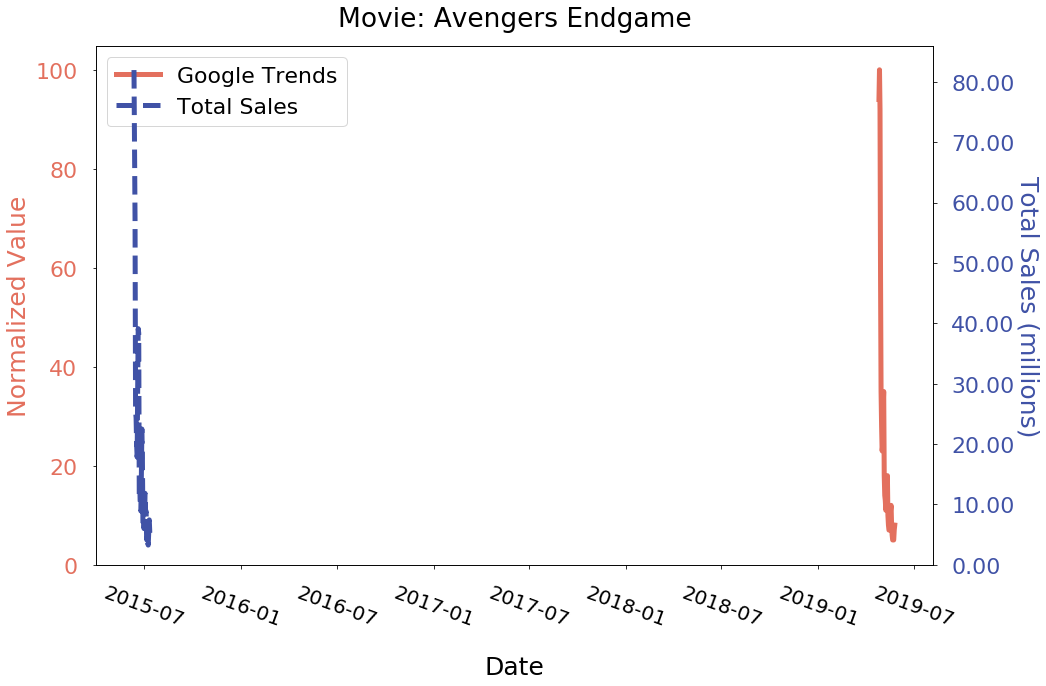

In [6]:
keywords = ['Jurassic World']
start_date = '2015-06-12'
end_date = '2015-07-12'
jurassicworld_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
jurassicworld_sales = box_office_df['jurassicworld'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(jurassicworld_trends, jurassicworld_sales, False, "Jurassic World Time Series")

## 1.2.1 Top Movies by Year

### Year: 2019

In [7]:
year_sales_df = pd.read_csv("../../../conf/movies/year_sales.csv").set_index('keywords')

In [8]:
keywords = ['Avengers', 'Toy Story', 'Lion King', 'Captain Marvel', 'Spider man', 'Aladdin', 'John Wick', 'Shazam']
start_date = '2019-01-01'
end_date = '2019-12-31'
trends_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(keywords, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)
 
sales_2019_df = year_sales_df['2019'].dropna().to_frame().rename(columns={'2019': 'Normalized Sales Volume'})
 
df = sales_2019_df.merge(trends_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=False)

2019-12-06 08:15:48,155 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Toy Story', 'Lion King', 'Captain Marvel', 'Spider man', 'Avengers'], start_date - 2019-01-01, end_date - 2019-12-31, category - None and geo - 
2019-12-06 08:15:48,306 | [google_trends.py get_trends_data:77] | [ERROR] - Exception occurred in getting data from Google Trends
Traceback (most recent call last):
  File "../..\utils\google_trends.py", line 70, in get_trends_data
    self.trend_request.build_payload(kw_list=keywords, cat=category, timeframe=timeframe, geo=geo)
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 167, in build_payload
    self._tokens()
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 177, in _tokens
    trim_chars=4,
  File "C:\Users\Xiaol\Anaconda3\lib\site-packages\pytrends\request.py", line 146, in _get_data
    response=response)
pytrends.exceptions.ResponseError: The request fail

KeyError: 'Avengers'

### Year: 2018

In [ ]:
keywords = ['Black Panther', 'Avengers', 'Incredibles', 'Jurassic World', 'Deadpool 2', 'Jumanji', 'Mission Impossible', 'Solo Star Wars']
start_date = '2018-01-01'
end_date = '2018-12-31'
trends_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(keywords, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)

sales_2018_df = year_sales_df['2018'].dropna().to_frame().rename(columns={'2018': 'Normalized Sales Volume'})

df = sales_2018_df.merge(trends_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=False)

## 1.2.2 Top Action Movies

In [ ]:
imdb = pd.read_csv("../../../conf/movies/imdb.csv")
genres = imdb['Genre'].str.split(',', expand=True)[0]
imdb['Genre'] = genres
imdb = imdb.sort_values(by=['Genre','Revenue (Millions)'], ascending=[True, False])
pat = '|'.join(['({})'.format(re.escape(c)) for c in string.punctuation])

imdb = imdb[~imdb['Title'].str.contains(pat)]
imdb = imdb[imdb['Year'] == 2016]

imdb_action = imdb[imdb['Genre'] == 'Action'][:8]
imdb_action = imdb_action[['Title', 'Revenue (Millions)']]
imdb_action_df = imdb_action.rename(columns={"Revenue (Millions)":"Normalized Sales Volume", "Title": "Movies"})
imdb_action_df.set_value(12, 'Movies', 'Star Wars')
idx = range(len(imdb_action))
movies_action = list(imdb_action_df.iloc[idx]['Movies'])
imdb_action_df.set_index(keys='Movies', inplace=True)
  
start_date = '2016-01-01'
end_date = '2016-12-31'
search_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(movies_action, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)
  
df = imdb_action_df.apply(lambda x : x*100/x.max()).merge(search_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=False)

## 1.3 Movie Ratings vs Trends

In [ ]:
# Data Preparation
imdb = pd.read_csv("../../../conf/movies/imdb.csv")
genres = imdb['Genre'].str.split(',', expand=True)[0]
imdb['Genre'] = genres
imdb = imdb.sort_values(by=['Genre','Revenue (Millions)'], ascending=[True, False])
pat = '|'.join(['({})'.format(re.escape(c)) for c in string.punctuation])
imdb = imdb[~imdb['Title'].str.contains(pat)]
imdb = imdb[imdb['Title'].str.split().str.len() <= 4]

df_popularity_list = []
for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    imdb_year = imdb[imdb['Year'] == year]
    imdb_score = imdb_year.sort_values(by="Metascore", ascending=False).dropna()
    bins = [0, 40, 60, 80, 100]
    scores = ['0-4', '4-6', '6-8', '8-10']
    imdb_score['MetascoreRange'] = pd.cut(imdb_score['Metascore'], bins, labels=scores)
    imdb_score.drop('Metascore', axis=1, inplace=True)
    imdb_score.rename(columns={"Revenue (Millions)":"Revenue", "MetascoreRange":"Score"}, inplace=True)
    imdb_score = imdb_score.sort_values(by=['Votes'], ascending=[False])[:40]
    imdb_score_grp_popularity = imdb_score.groupby(['Score']).count()['Votes'].to_frame()
    df_popularity_list.append(imdb_score_grp_popularity)

df_revenue_list = []
for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    imdb_year = imdb[imdb['Year'] == year]
    imdb_score = imdb_year.sort_values(by="Metascore", ascending=False).dropna()
    bins = [0, 40, 60, 80, 100]
    scores = ['0-4', '4-6', '6-8', '8-10']
    imdb_score['MetascoreRange'] = pd.cut(imdb_score['Metascore'], bins, labels=scores)
    imdb_score.drop('Metascore', axis=1, inplace=True)
    imdb_score.rename(columns={"Revenue (Millions)":"Revenue", "MetascoreRange":"Score"}, inplace=True)
    imdb_score = imdb_score.sort_values(by=['Revenue'], ascending=[False])[:40]
    imdb_score_grp_revenue = imdb_score.groupby(['Score']).count()['Revenue'].to_frame()
    df_revenue_list.append(imdb_score_grp_revenue) 

In [ ]:
revenue_dict = defaultdict(list)
for i in range(len(df_revenue_list)):
    revenue_dict['0-4'].append(list(df_revenue_list[i]['Revenue'])[0])
    revenue_dict['4-6'].append(list(df_revenue_list[i]['Revenue'])[1])
    revenue_dict['6-8'].append(list(df_revenue_list[i]['Revenue'])[2])
    revenue_dict['8-10'].append(list(df_revenue_list[i]['Revenue'])[3])

popularity_dict = defaultdict(list)
for i in range(len(df_popularity_list)):
    popularity_dict['0-4'].append(list(df_popularity_list[i]['Votes'])[0])
    popularity_dict['4-6'].append(list(df_popularity_list[i]['Votes'])[1])
    popularity_dict['6-8'].append(list(df_popularity_list[i]['Votes'])[2])
    popularity_dict['8-10'].append(list(df_popularity_list[i]['Votes'])[3])  

In [ ]:
# By Revenue
misc.stacked_bar_plot(revenue_dict, False)   

In [ ]:
# By Popularity
misc.stacked_bar_plot(popularity_dict, False)

# 2 Video Games Analysis

In [ ]:
cat = '8' # Category = Games
gt = GoogleTrends()

## 2.1 Individual Games vs Search Trends

This analysis compare games' Monthly Search Volume with corresponding Monthly Sales
over a 6-month launch period, from 1 month before launch to 4 months after launch.

In [ ]:
def get_date(release_date):
    """
    This function returns the starting and ending dates based on the release date. 
    starting date = 1 month before release date
    ending date = 4 months after release date
    
    Args:
        release_date (str): 'Year-Month-Day', e.g. '2017-11-03'
    Return:
        starting date and ending date
    """
    date = pd.Timestamp(release_date) - timedelta.relativedelta(months=1)
    time_range = pd.date_range(start=date,periods=6,freq='m').strftime('%Y-%m-%d').tolist()
    start_date = time_range[0]
    end_date = time_range[-1]
    return start_date, end_date

In [ ]:
# Vgchartz Data
vg_df = pd.read_csv("../../../conf/video_games/input/vgsales-game-sale-history.csv",delimiter=',').T
vg_df.columns = vg_df.iloc[0]
vg_df.drop(vg_df.index[0],axis=0,inplace=True)

In [ ]:
# Google Trends Data
keywords = ['Call of Duty: WWII']
release_date = '2017-11-03'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

In [ ]:
# Google Trends Data
keywords = ['Battlefield 1']
release_date = '2016-10-21'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

In [ ]:
# Google Trends Data
keywords = ['1-2-Switch']
release_date = '2017-03-03'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

In [ ]:
# Google Trends Data
keywords = ['Pokemon Ultra Sun and Ultra Moon']
release_date = '2017-11-17'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

## 2.2.1 Top Games by Year

This analysis compares the Total Search Volume with the Total Sales of 
Top 8 video games released in a specified Year or by a specified Platform.<br>
For example, with year = 2015, top_num = 100, it returns top 100 games released in 2015

In [ ]:
start_date = '2004-01-01'
end_date = '2019-11-19'
filename = '../../../conf/video_games/input/vgsales-refined-data.csv'

In [ ]:
def top_games(vg_df):
    """
    This function gets total search volume of keywords from the index of the input dataframe
    and compares total search volume with total sales using a bar plot.
    
    Args:
        vg_df (dataframe): dataframe contains total sales
    """
    assert isinstance(vg_df,pd.DataFrame)
    
    # get keywords from sorted vgchart dataframe
    keywords = vg_df.index.tolist()
    
    # optimize keywords by suggestion from Pytrends
    keywords_suggested = []
    for kw in keywords:
        try:
            keywords_suggested.append(gt.trend_request.suggestions(kw)[0]['mid'])
        except IndexError:
            keywords_suggested.append(kw)

    # get and process google-trends data
    gt.get_trends_data_from_multiple_keywords(keywords=keywords_suggested, start_date=start_date,end_date=end_date, category=cat)
    gt.sort_data_by_year()

    # create a dataframe storing the max search volume of each year
    gt_df = gt.data_by_year.max().to_frame(name='Normalized Search Volume')

    # normalize and set game names as index
    gt_df = gt_df / gt_df.max() * 100
    gt_df.set_index(vg_df.index,inplace=True)

    # combine two dataframes
    df = pd.concat((vg_df,gt_df),axis=1,sort=True)

    # drop rows with zero search volume
    df.drop(df[gt_df.iloc[:,0] == 0].index,inplace=True)
    df = df / df.max() * 100
    df['diff'] = abs(df.iloc[:,0]-df.iloc[:,1])
    df2 = df.drop(df[df['diff'] > 5].index)

    # normalize by max of each column
    df2 = df2 / df2.max() * 100 
    df2['diff'] = abs(df2.iloc[:,0]-df2.iloc[:,1])
    df2 = df2.sort_values(by='Normalized Sales Volume',ascending=False)

    # plot
    misc.bar_plot(df2.iloc[:num_games,:],ylabel='Games',save_fig=False)

### Year: 2015

In [ ]:
# Get sorted vgchartz dataframe with Index = Game Name, Column = Total Sales
year = 2015
top_num = 100
vg_df = data_preprocess.keyword_data_sorting(filename,year=[year],top=top_num)

In [ ]:
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

### Year: 2017

In [ ]:
year = 2017
top_num = 50
vg_df = data_preprocess.keyword_data_sorting(filename,year=[year],top=top_num)
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

## 2.2.2 Top Games by Platform

For example, with platform = 'PS4', top_num = 100, it returns top 100 games released by 'PS4'

### Platform: PS4

In [ ]:
platform = 'PS4'
top_num = 100
vg_df = data_preprocess.keyword_data_sorting(filename,platform=[platform],top=top_num)
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

### Platform: Xbox One

In [ ]:
platform = 'XOne'
top_num = 100
vg_df = data_preprocess.keyword_data_sorting(filename,platform=[platform],top=top_num)
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

## 2.3 Platforms' Sales over Time vs Search Trends

This analysis compares the Total Sales of games under the Platforms that
have the highest sales with corresponding Total Search Volume from 2004 to 2018.

In [ ]:
# Vgchartz Data
feature = 'Platform'
fname = '../../../conf/video_games/input/vgsales-refined-data.csv'
vg_df = data_preprocess.data_sorting(fname, feature, limit=4, bar_plot=True)

In [ ]:
# Google Trends Data
keywords = vg_df.columns.to_list()
start_date = '2004-01-01'
end_date = '2018-12-31'
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year()
gt.stack_bar_plot(show_values=False,value_format='{:.2f}',save_fig=False)